<a href="https://colab.research.google.com/github/IvanCampos11/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
from IPython.display import display, Image

In [3]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

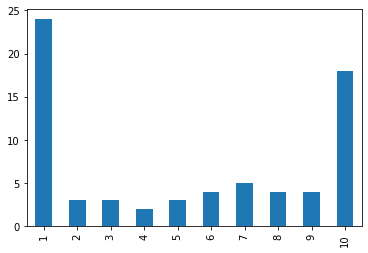

In [6]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar();

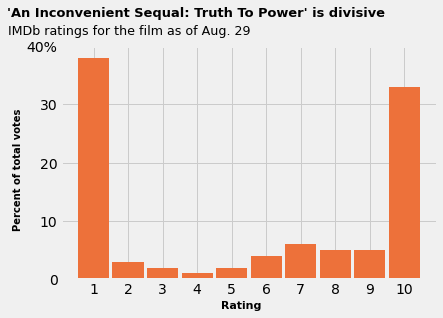

In [209]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()

ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=.9)

#does all labels and ticks for x axis
ax.set_xlabel('Rating', fontweight='bold', fontsize='11', x=0.48)
ax.set_xticks((range(1,11,1)))
#does all labels and ticks for y axis
ax.set_ylabel('Percent of total votes', fontweight='bold', fontsize='10',y=0.47)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'])
#title and subtext 
ax.set_title("'An Inconvenient Sequal: Truth To Power' is divisive", x= 0.36, y=1.1, fontweight='bold', fontsize='13')
ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.48, y=42, fontsize='12.6')


plt.show()

In [165]:
states = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-state.csv")

states

,state,urbanindex
0,Alabama,9.605935
1,Alaska,8.735964
2,American Samoa,11.085930
3,Arizona,11.299710
4,Arkansas,9.259444
5,California,12.190280
6,Colorado,11.154450
7,Connecticut,11.409680
8,Delaware,11.009990
9,District of Columbia,13.440570


In [0]:
partisan = pd.DataFrame({'state': ['Alabama', 'Alaska','Arizona','Arkansas','California',
                                       'Colorado','Connecticut','Delaware','Florida','Georgia',
                                       'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',
                                       'Kentucky','Louisiana','Maine','Maryland','Massachusetts',
                                       'Michigan','Minnesota','Mississippi','Missouri','Montana',
                                       'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
                                       'New York','North Carolina','North Dakota','Ohio','Oklahoma',
                                       'Oregon','Pennsylvania','Rhode Island','South Carolina',
                                       'South Dakota','Tennessee','Texas','Utah','Vermont',
                                       'Virginia','Washington','West Virginia','Wisconsin','Wyoming'],
                                  'partisan_lean': [-27,-15,-9,24,24
                                                    ,11,10,11,14,-5,-12,36
                                                    ,-35,13,-18,-6,
                                                    -23,-23,-17,5,23,29
                                                    ,1,2,-15,-18,-24,-1,-2,13,
                                                    7,22,-5,-33,-7,
                                                    -34,9,-1,26,-17
                                                    ,-31,-28,-17,-31,24
                                                    ,0,12,-30,-1,-47]})

In [211]:
partisan.head(10)

,state,partisan_lean
0,Alabama,-27
1,Alaska,-15
2,Arizona,-9
3,Arkansas,24
4,California,24
5,Colorado,11
6,Connecticut,10
7,Delaware,11
8,Florida,14
9,Georgia,-5


In [0]:
merged_states = pd.merge(states, partisan)

In [213]:
merged_states.head()

,state,urbanindex,partisan_lean
0,Alabama,9.605935,-27
1,Alaska,8.735964,-15
2,Arizona,11.299710,-9
3,Arkansas,9.259444,24
4,California,12.190280,24


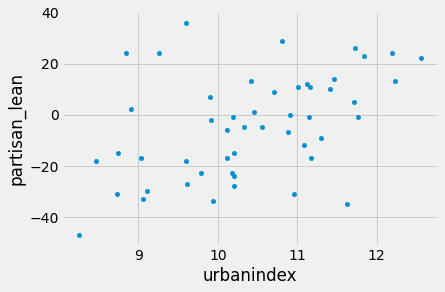

In [214]:
merged_states.plot.scatter(x='urbanindex', y='partisan_lean');

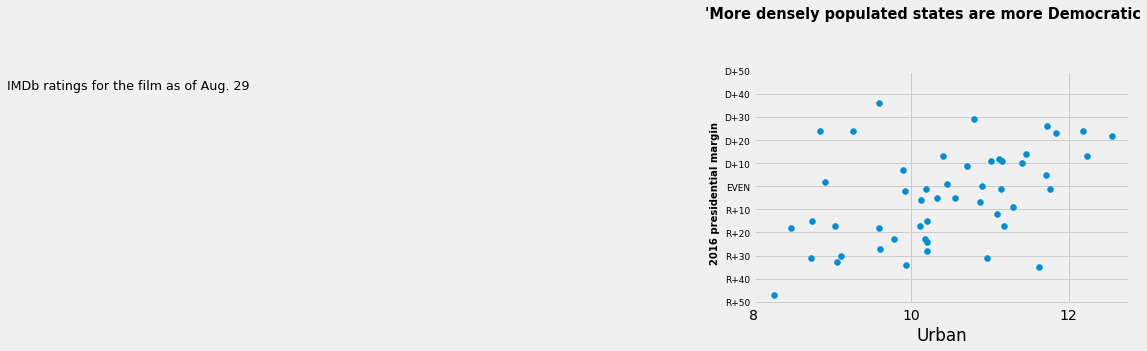

In [263]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()

ax.scatter(x=merged_states['urbanindex'],y=merged_states['partisan_lean'])

#does all labels and ticks for x axis
ax.set_xlabel('Urban')
ax.set_xticks((range(8,14,2)))
#does all labels and ticks for y axis
ax.set_ylabel('2016 presidential margin', fontweight='bold', fontsize='10',y=0.48)
ax.set_yticks(range(-50,60,10))
ax.set_yticklabels(['R+50','R+40','R+30', 'R+20','R+10','EVEN','D+10','D+20','D+30','D+40','D+50'], fontsize='9')
# #title and subtext 
ax.set_title("'More densely populated states are more Democratic", fontweight='bold',fontsize='14.5', x=0.45, y=1.2)
ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.48, y=42, fontsize='12.6')


plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here